<a href="https://colab.research.google.com/github/prateeksha112/coding/blob/main/HSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

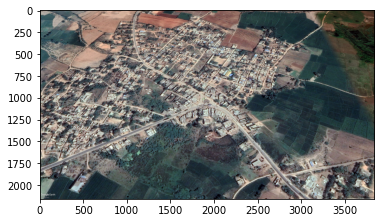

In [4]:
img = io.imread('/content/1.jpg')
plt.imshow(img)

In [42]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, (10,10, 90), (30,50,255))

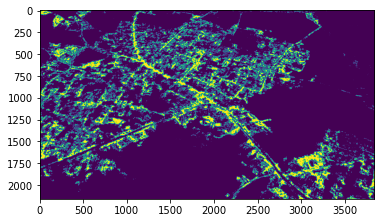

In [43]:
plt.imshow(mask)

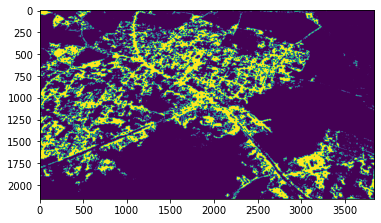

In [44]:
from scipy import ndimage as nd
closed_mask = nd.binary_closing(mask, np.ones((7, 7)))

plt.imshow(closed_mask)

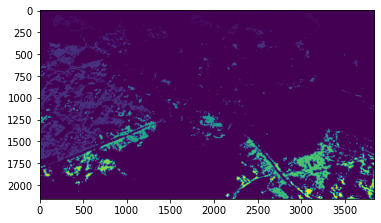

In [45]:
label_image = measure.label(closed_mask)
plt.imshow(label_image)

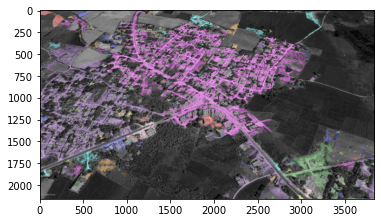

In [46]:
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_image, image = img)
plt.imshow(image_label_overlay)

In [47]:
props = measure.regionprops_table(label_image, img, properties = ['label', 'area', 'equivalent_diameter','mean_intensity', 'solidity'])

In [48]:
import pandas as pd
df = pd.DataFrame(props)
print(df.head())

   label    area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0      1    5041            80.114921        168.158302        161.755802   
1      2    5611            84.523057        166.184816        151.340937   
2      3       7             2.985411        178.428571        154.428571   
3      4  796139          1006.814610        164.010791        154.309662   
4      5      71             9.507892        137.563380        127.281690   

   mean_intensity-2  solidity  
0        154.183297  0.857751  
1        140.729460  0.566939  
2        142.428571  1.000000  
3        144.042086  0.343047  
4        117.845070  0.887500  
